# Solution for CartPole problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
def plot_cost_history(episode_rewards,avg):
    # create figure
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)

    # plot total reward history
    episode_rewards = np.array(episode_rewards)
    ax.plot(episode_rewards.flatten())
    if avg=='avg':
        ax.set_ylabel('average reward over 100 episode ')
    else:
        ax.set_ylabel('total episode reward')
    ax.set_xlabel('episode')
    plt.show()
def avg_reward(tt):
    avg=[]
    for i in range(len(tt)):
        sub=tt[i:i+100]
        aa=np.average(sub)
        avg.append(aa)
    return avg


In [7]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD, Nadam
from keras import backend as K
EPISODES = 3000


class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.99    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        #model.compile(loss=self._huber_loss,
         #             optimizer=Adam(lr=self.learning_rate))
        #model.compile(loss='mse',
         #             optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True))
        #Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.0)
        #SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        #RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    # agent.load("./save/cartpole-dqn.h5")
    done = False
    batch_size = 32
    total_reward=[]
    epi_reward=0
    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward.append(epi_reward)
        epi_reward=0
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            epi_reward+=reward
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        # if e % 10 == 0:
        #     agent.save("./save/cartpole-dqn.h5")


/Users/linrl3/Desktop/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode: 0/3000, score: 12, e: 1.0
episode: 1/3000, score: 25, e: 1.0
episode: 2/3000, score: 23, e: 0.99
episode: 3/3000, score: 17, e: 0.99
episode: 4/3000, score: 24, e: 0.99
episode: 5/3000, score: 18, e: 0.98
episode: 6/3000, score: 41, e: 0.98
episode: 7/3000, score: 13, e: 0.97
episode: 8/3000, score: 34, e: 0.97
episode: 9/3000, score: 14, e: 0.96
episode: 10/3000, score: 28, e: 0.96
episode: 11/3000, score: 25, e: 0.95
episode: 12/3000, score: 27, e: 0.95
episode: 13/3000, score: 13, e: 0.94
episode: 14/3000, score: 18, e: 0.94
episode: 15/3000, score: 20, e: 0.93
episode: 16/3000, score: 42, e: 0.93
episode: 17/3000, score: 62, e: 0.92
episode: 18/3000, score: 21, e: 0.92
episode: 19/3000, score: 24, e: 0.91
episode: 20/3000, score: 22, e: 0.91
episode: 21/3000, score: 12, e: 0.9
episode: 22/3000, score: 14, e: 0.9
episode: 23/3000, score: 35, e: 0.9
episode: 24/3000, score: 26,

episode: 218/3000, score: 105, e: 0.34
episode: 219/3000, score: 214, e: 0.34
episode: 220/3000, score: 38, e: 0.33
episode: 221/3000, score: 38, e: 0.33
episode: 222/3000, score: 129, e: 0.33
episode: 223/3000, score: 84, e: 0.33
episode: 224/3000, score: 72, e: 0.33
episode: 225/3000, score: 96, e: 0.33
episode: 226/3000, score: 72, e: 0.32
episode: 227/3000, score: 190, e: 0.32
episode: 228/3000, score: 95, e: 0.32
episode: 229/3000, score: 204, e: 0.32
episode: 230/3000, score: 127, e: 0.32
episode: 231/3000, score: 93, e: 0.32
episode: 232/3000, score: 183, e: 0.31
episode: 233/3000, score: 61, e: 0.31
episode: 234/3000, score: 72, e: 0.31
episode: 235/3000, score: 97, e: 0.31
episode: 236/3000, score: 138, e: 0.31
episode: 237/3000, score: 153, e: 0.31
episode: 238/3000, score: 129, e: 0.3
episode: 239/3000, score: 177, e: 0.3
episode: 240/3000, score: 268, e: 0.3
episode: 241/3000, score: 169, e: 0.3
episode: 242/3000, score: 158, e: 0.3
episode: 243/3000, score: 138, e: 0.3
epi

episode: 432/3000, score: 384, e: 0.12
episode: 433/3000, score: 124, e: 0.11
episode: 434/3000, score: 194, e: 0.11
episode: 435/3000, score: 246, e: 0.11
episode: 436/3000, score: 499, e: 0.11
episode: 437/3000, score: 405, e: 0.11
episode: 438/3000, score: 477, e: 0.11
episode: 439/3000, score: 486, e: 0.11
episode: 440/3000, score: 499, e: 0.11
episode: 441/3000, score: 310, e: 0.11
episode: 442/3000, score: 499, e: 0.11
episode: 443/3000, score: 289, e: 0.11
episode: 444/3000, score: 499, e: 0.11
episode: 445/3000, score: 499, e: 0.11
episode: 446/3000, score: 499, e: 0.11
episode: 447/3000, score: 499, e: 0.11
episode: 448/3000, score: 499, e: 0.11
episode: 449/3000, score: 499, e: 0.11
episode: 450/3000, score: 499, e: 0.11
episode: 451/3000, score: 482, e: 0.1
episode: 452/3000, score: 499, e: 0.1
episode: 453/3000, score: 499, e: 0.1
episode: 454/3000, score: 499, e: 0.1
episode: 455/3000, score: 421, e: 0.1
episode: 456/3000, score: 463, e: 0.1
episode: 457/3000, score: 499, 

episode: 641/3000, score: 278, e: 0.04
episode: 642/3000, score: 381, e: 0.04
episode: 643/3000, score: 499, e: 0.04
episode: 644/3000, score: 499, e: 0.04
episode: 645/3000, score: 499, e: 0.04
episode: 646/3000, score: 499, e: 0.039
episode: 647/3000, score: 499, e: 0.039
episode: 648/3000, score: 499, e: 0.039
episode: 649/3000, score: 499, e: 0.039
episode: 650/3000, score: 499, e: 0.039
episode: 651/3000, score: 499, e: 0.038
episode: 652/3000, score: 499, e: 0.038
episode: 653/3000, score: 499, e: 0.038
episode: 654/3000, score: 407, e: 0.038
episode: 655/3000, score: 499, e: 0.038
episode: 656/3000, score: 130, e: 0.038
episode: 657/3000, score: 183, e: 0.037
episode: 658/3000, score: 499, e: 0.037
episode: 659/3000, score: 447, e: 0.037
episode: 660/3000, score: 499, e: 0.037
episode: 661/3000, score: 499, e: 0.037
episode: 662/3000, score: 499, e: 0.036
episode: 663/3000, score: 499, e: 0.036
episode: 664/3000, score: 499, e: 0.036
episode: 665/3000, score: 499, e: 0.036
episo

episode: 848/3000, score: 157, e: 0.014
episode: 849/3000, score: 178, e: 0.014
episode: 850/3000, score: 193, e: 0.014
episode: 851/3000, score: 208, e: 0.014
episode: 852/3000, score: 169, e: 0.014
episode: 853/3000, score: 243, e: 0.014
episode: 854/3000, score: 184, e: 0.014
episode: 855/3000, score: 191, e: 0.014
episode: 856/3000, score: 309, e: 0.014
episode: 857/3000, score: 499, e: 0.014
episode: 858/3000, score: 207, e: 0.014
episode: 859/3000, score: 142, e: 0.014
episode: 860/3000, score: 152, e: 0.013
episode: 861/3000, score: 136, e: 0.013
episode: 862/3000, score: 262, e: 0.013
episode: 863/3000, score: 312, e: 0.013
episode: 864/3000, score: 499, e: 0.013
episode: 865/3000, score: 499, e: 0.013
episode: 866/3000, score: 499, e: 0.013
episode: 867/3000, score: 227, e: 0.013
episode: 868/3000, score: 214, e: 0.013
episode: 869/3000, score: 214, e: 0.013
episode: 870/3000, score: 228, e: 0.013
episode: 871/3000, score: 244, e: 0.013
episode: 872/3000, score: 236, e: 0.013


episode: 1057/3000, score: 383, e: 0.01
episode: 1058/3000, score: 499, e: 0.01
episode: 1059/3000, score: 198, e: 0.01
episode: 1060/3000, score: 256, e: 0.01
episode: 1061/3000, score: 270, e: 0.01
episode: 1062/3000, score: 316, e: 0.01
episode: 1063/3000, score: 235, e: 0.01
episode: 1064/3000, score: 433, e: 0.01
episode: 1065/3000, score: 295, e: 0.01
episode: 1066/3000, score: 250, e: 0.01
episode: 1067/3000, score: 499, e: 0.01
episode: 1068/3000, score: 222, e: 0.01
episode: 1069/3000, score: 179, e: 0.01
episode: 1070/3000, score: 210, e: 0.01
episode: 1071/3000, score: 227, e: 0.01
episode: 1072/3000, score: 349, e: 0.01
episode: 1073/3000, score: 234, e: 0.01
episode: 1074/3000, score: 260, e: 0.01
episode: 1075/3000, score: 246, e: 0.01
episode: 1076/3000, score: 499, e: 0.01
episode: 1077/3000, score: 315, e: 0.01
episode: 1078/3000, score: 279, e: 0.01
episode: 1079/3000, score: 298, e: 0.01
episode: 1080/3000, score: 281, e: 0.01
episode: 1081/3000, score: 254, e: 0.01


episode: 1265/3000, score: 93, e: 0.01
episode: 1266/3000, score: 49, e: 0.01
episode: 1267/3000, score: 37, e: 0.01
episode: 1268/3000, score: 90, e: 0.01
episode: 1269/3000, score: 98, e: 0.01
episode: 1270/3000, score: 95, e: 0.01
episode: 1271/3000, score: 94, e: 0.01
episode: 1272/3000, score: 39, e: 0.01
episode: 1273/3000, score: 29, e: 0.01
episode: 1274/3000, score: 44, e: 0.01
episode: 1275/3000, score: 28, e: 0.01
episode: 1276/3000, score: 14, e: 0.01
episode: 1277/3000, score: 18, e: 0.01
episode: 1278/3000, score: 14, e: 0.01
episode: 1279/3000, score: 13, e: 0.01
episode: 1280/3000, score: 17, e: 0.01
episode: 1281/3000, score: 27, e: 0.01
episode: 1282/3000, score: 98, e: 0.01
episode: 1283/3000, score: 105, e: 0.01
episode: 1284/3000, score: 97, e: 0.01
episode: 1285/3000, score: 98, e: 0.01
episode: 1286/3000, score: 42, e: 0.01
episode: 1287/3000, score: 101, e: 0.01
episode: 1288/3000, score: 57, e: 0.01
episode: 1289/3000, score: 42, e: 0.01
episode: 1290/3000, sco

episode: 1471/3000, score: 499, e: 0.01
episode: 1472/3000, score: 499, e: 0.01
episode: 1473/3000, score: 499, e: 0.01
episode: 1474/3000, score: 499, e: 0.01
episode: 1475/3000, score: 499, e: 0.01
episode: 1476/3000, score: 499, e: 0.01
episode: 1477/3000, score: 499, e: 0.01
episode: 1478/3000, score: 499, e: 0.01
episode: 1479/3000, score: 499, e: 0.01
episode: 1480/3000, score: 499, e: 0.01
episode: 1481/3000, score: 499, e: 0.01
episode: 1482/3000, score: 499, e: 0.01
episode: 1483/3000, score: 499, e: 0.01
episode: 1484/3000, score: 499, e: 0.01
episode: 1485/3000, score: 499, e: 0.01
episode: 1486/3000, score: 499, e: 0.01
episode: 1487/3000, score: 499, e: 0.01
episode: 1488/3000, score: 499, e: 0.01
episode: 1489/3000, score: 499, e: 0.01
episode: 1490/3000, score: 499, e: 0.01
episode: 1491/3000, score: 499, e: 0.01
episode: 1492/3000, score: 499, e: 0.01
episode: 1493/3000, score: 499, e: 0.01
episode: 1494/3000, score: 499, e: 0.01
episode: 1495/3000, score: 499, e: 0.01


episode: 1677/3000, score: 156, e: 0.01
episode: 1678/3000, score: 129, e: 0.01
episode: 1679/3000, score: 204, e: 0.01
episode: 1680/3000, score: 154, e: 0.01
episode: 1681/3000, score: 138, e: 0.01
episode: 1682/3000, score: 140, e: 0.01
episode: 1683/3000, score: 143, e: 0.01
episode: 1684/3000, score: 138, e: 0.01
episode: 1685/3000, score: 149, e: 0.01
episode: 1686/3000, score: 149, e: 0.01
episode: 1687/3000, score: 141, e: 0.01
episode: 1688/3000, score: 162, e: 0.01
episode: 1689/3000, score: 152, e: 0.01
episode: 1690/3000, score: 161, e: 0.01
episode: 1691/3000, score: 167, e: 0.01
episode: 1692/3000, score: 147, e: 0.01
episode: 1693/3000, score: 151, e: 0.01
episode: 1694/3000, score: 141, e: 0.01
episode: 1695/3000, score: 143, e: 0.01
episode: 1696/3000, score: 239, e: 0.01
episode: 1697/3000, score: 144, e: 0.01
episode: 1698/3000, score: 125, e: 0.01
episode: 1699/3000, score: 127, e: 0.01
episode: 1700/3000, score: 110, e: 0.01
episode: 1701/3000, score: 123, e: 0.01


episode: 1883/3000, score: 449, e: 0.01
episode: 1884/3000, score: 214, e: 0.01
episode: 1885/3000, score: 200, e: 0.01
episode: 1886/3000, score: 168, e: 0.01
episode: 1887/3000, score: 177, e: 0.01
episode: 1888/3000, score: 179, e: 0.01
episode: 1889/3000, score: 240, e: 0.01
episode: 1890/3000, score: 308, e: 0.01
episode: 1891/3000, score: 303, e: 0.01
episode: 1892/3000, score: 396, e: 0.01
episode: 1893/3000, score: 227, e: 0.01
episode: 1894/3000, score: 399, e: 0.01
episode: 1895/3000, score: 487, e: 0.01
episode: 1896/3000, score: 177, e: 0.01
episode: 1897/3000, score: 292, e: 0.01
episode: 1898/3000, score: 342, e: 0.01
episode: 1899/3000, score: 294, e: 0.01
episode: 1900/3000, score: 355, e: 0.01
episode: 1901/3000, score: 198, e: 0.01
episode: 1902/3000, score: 365, e: 0.01
episode: 1903/3000, score: 411, e: 0.01
episode: 1904/3000, score: 185, e: 0.01
episode: 1905/3000, score: 499, e: 0.01
episode: 1906/3000, score: 499, e: 0.01
episode: 1907/3000, score: 499, e: 0.01


episode: 2088/3000, score: 151, e: 0.01
episode: 2089/3000, score: 164, e: 0.01
episode: 2090/3000, score: 131, e: 0.01
episode: 2091/3000, score: 160, e: 0.01
episode: 2092/3000, score: 194, e: 0.01
episode: 2093/3000, score: 207, e: 0.01
episode: 2094/3000, score: 181, e: 0.01
episode: 2095/3000, score: 232, e: 0.01
episode: 2096/3000, score: 172, e: 0.01
episode: 2097/3000, score: 155, e: 0.01
episode: 2098/3000, score: 154, e: 0.01
episode: 2099/3000, score: 152, e: 0.01
episode: 2100/3000, score: 150, e: 0.01
episode: 2101/3000, score: 132, e: 0.01
episode: 2102/3000, score: 129, e: 0.01
episode: 2103/3000, score: 140, e: 0.01
episode: 2104/3000, score: 163, e: 0.01
episode: 2105/3000, score: 179, e: 0.01
episode: 2106/3000, score: 161, e: 0.01
episode: 2107/3000, score: 139, e: 0.01
episode: 2108/3000, score: 145, e: 0.01
episode: 2109/3000, score: 147, e: 0.01
episode: 2110/3000, score: 156, e: 0.01
episode: 2111/3000, score: 146, e: 0.01
episode: 2112/3000, score: 134, e: 0.01


episode: 2293/3000, score: 372, e: 0.01
episode: 2294/3000, score: 499, e: 0.01
episode: 2295/3000, score: 499, e: 0.01
episode: 2296/3000, score: 499, e: 0.01
episode: 2297/3000, score: 340, e: 0.01
episode: 2298/3000, score: 252, e: 0.01
episode: 2299/3000, score: 499, e: 0.01
episode: 2300/3000, score: 139, e: 0.01
episode: 2301/3000, score: 147, e: 0.01
episode: 2302/3000, score: 499, e: 0.01
episode: 2303/3000, score: 499, e: 0.01
episode: 2304/3000, score: 326, e: 0.01
episode: 2305/3000, score: 499, e: 0.01
episode: 2306/3000, score: 499, e: 0.01
episode: 2307/3000, score: 499, e: 0.01
episode: 2308/3000, score: 499, e: 0.01
episode: 2309/3000, score: 499, e: 0.01
episode: 2310/3000, score: 499, e: 0.01
episode: 2311/3000, score: 499, e: 0.01
episode: 2312/3000, score: 113, e: 0.01
episode: 2313/3000, score: 175, e: 0.01
episode: 2314/3000, score: 499, e: 0.01
episode: 2315/3000, score: 499, e: 0.01
episode: 2316/3000, score: 499, e: 0.01
episode: 2317/3000, score: 499, e: 0.01


episode: 2499/3000, score: 499, e: 0.01
episode: 2500/3000, score: 499, e: 0.01
episode: 2501/3000, score: 181, e: 0.01
episode: 2502/3000, score: 499, e: 0.01
episode: 2503/3000, score: 499, e: 0.01
episode: 2504/3000, score: 499, e: 0.01
episode: 2505/3000, score: 499, e: 0.01
episode: 2506/3000, score: 499, e: 0.01
episode: 2507/3000, score: 499, e: 0.01
episode: 2508/3000, score: 499, e: 0.01
episode: 2509/3000, score: 499, e: 0.01
episode: 2510/3000, score: 499, e: 0.01
episode: 2511/3000, score: 499, e: 0.01
episode: 2512/3000, score: 499, e: 0.01
episode: 2513/3000, score: 499, e: 0.01
episode: 2514/3000, score: 499, e: 0.01
episode: 2515/3000, score: 499, e: 0.01
episode: 2516/3000, score: 499, e: 0.01
episode: 2517/3000, score: 499, e: 0.01
episode: 2518/3000, score: 499, e: 0.01
episode: 2519/3000, score: 499, e: 0.01
episode: 2520/3000, score: 499, e: 0.01
episode: 2521/3000, score: 499, e: 0.01
episode: 2522/3000, score: 499, e: 0.01
episode: 2523/3000, score: 499, e: 0.01


episode: 2706/3000, score: 180, e: 0.01
episode: 2707/3000, score: 211, e: 0.01
episode: 2708/3000, score: 204, e: 0.01
episode: 2709/3000, score: 208, e: 0.01
episode: 2710/3000, score: 235, e: 0.01
episode: 2711/3000, score: 223, e: 0.01
episode: 2712/3000, score: 212, e: 0.01
episode: 2713/3000, score: 181, e: 0.01
episode: 2714/3000, score: 201, e: 0.01
episode: 2715/3000, score: 155, e: 0.01
episode: 2716/3000, score: 121, e: 0.01
episode: 2717/3000, score: 105, e: 0.01
episode: 2718/3000, score: 118, e: 0.01
episode: 2719/3000, score: 122, e: 0.01
episode: 2720/3000, score: 109, e: 0.01
episode: 2721/3000, score: 126, e: 0.01
episode: 2722/3000, score: 129, e: 0.01
episode: 2723/3000, score: 127, e: 0.01
episode: 2724/3000, score: 132, e: 0.01
episode: 2725/3000, score: 136, e: 0.01
episode: 2726/3000, score: 138, e: 0.01
episode: 2727/3000, score: 132, e: 0.01
episode: 2728/3000, score: 117, e: 0.01
episode: 2729/3000, score: 148, e: 0.01
episode: 2730/3000, score: 97, e: 0.01
e

episode: 2911/3000, score: 279, e: 0.01
episode: 2912/3000, score: 240, e: 0.01
episode: 2913/3000, score: 277, e: 0.01
episode: 2914/3000, score: 281, e: 0.01
episode: 2915/3000, score: 275, e: 0.01
episode: 2916/3000, score: 263, e: 0.01
episode: 2917/3000, score: 283, e: 0.01
episode: 2918/3000, score: 311, e: 0.01
episode: 2919/3000, score: 265, e: 0.01
episode: 2920/3000, score: 262, e: 0.01
episode: 2921/3000, score: 328, e: 0.01
episode: 2922/3000, score: 286, e: 0.01
episode: 2923/3000, score: 265, e: 0.01
episode: 2924/3000, score: 245, e: 0.01
episode: 2925/3000, score: 499, e: 0.01
episode: 2926/3000, score: 203, e: 0.01
episode: 2927/3000, score: 349, e: 0.01
episode: 2928/3000, score: 267, e: 0.01
episode: 2929/3000, score: 215, e: 0.01
episode: 2930/3000, score: 231, e: 0.01
episode: 2931/3000, score: 233, e: 0.01
episode: 2932/3000, score: 210, e: 0.01
episode: 2933/3000, score: 251, e: 0.01
episode: 2934/3000, score: 252, e: 0.01
episode: 2935/3000, score: 278, e: 0.01


In [3]:
#plot_cost_history(total_reward,'his')
#plot_cost_history(avg_reward(total_reward),'avg')
#import pickle
#with open('total_reward_Cartpole_final2', 'wb') as fp:
 #   pickle.dump(total_reward, fp)

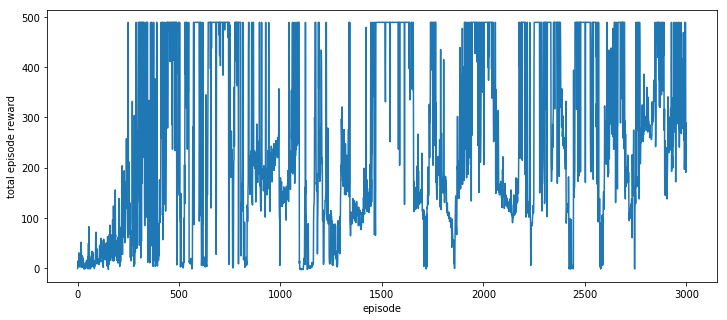

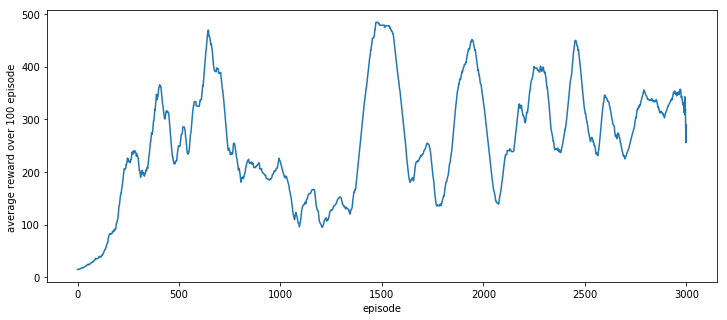

In [2]:
with open ('total_reward_Cartpole_final2', 'rb') as fp:
    his = pickle.load(fp)
average=avg_reward(his)
plot_cost_history(his,'his')
plot_cost_history(average,'avg')